In [33]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [34]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42
)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled= ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


#### DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8584615384615385


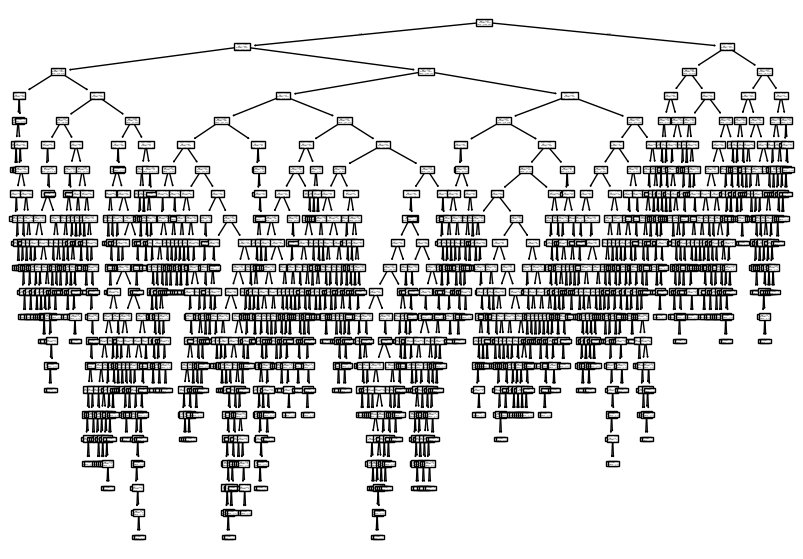

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

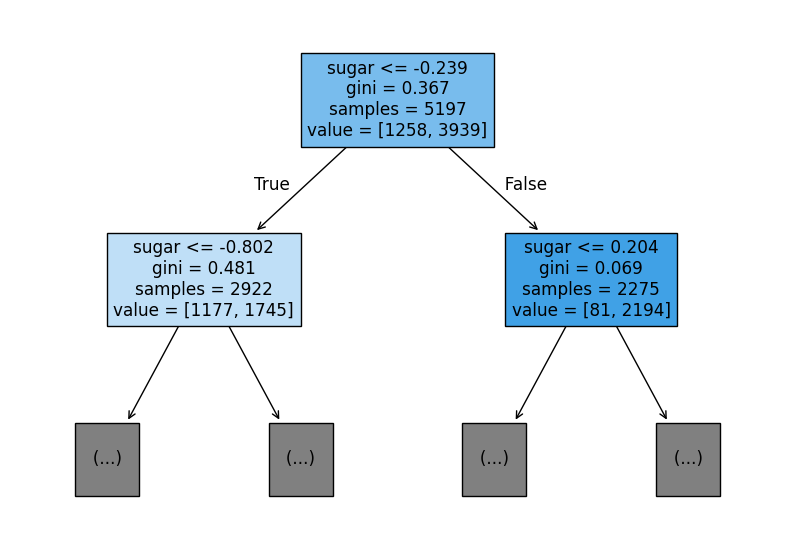

In [40]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

#### P233

In [41]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, random_state=42, test_size=0.2
)

In [42]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))

0.8703391869136397
0.8711538461538462


In [43]:
print(dt.score(test_input,test_target))

0.86


In [44]:
from sklearn.model_selection import cross_validate
import numpy as np
scores = cross_validate(dt, train_input,train_target)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.84711538 0.86346154 0.88065448 0.83638114 0.8614052 ]
0.857803546309321


In [45]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.84711538 0.86346154 0.88065448 0.83638114 0.8614052 ]
0.857803546309321


In [46]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.85769231 0.86730769 0.82307692 0.85769231 0.85192308 0.86538462
 0.86538462 0.85163776 0.83815029 0.85741811]
0.8535667704164815


In [47]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [48]:
print(gs.cv_results_['mean_test_score'])

dt = gs.best_estimator_
print(dt)
print(dt.score(train_input, train_target))
print(f"test_score: {dt.score(test_input,test_target)}")

print(gs.best_params_)


[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]
DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)
0.9615162593804117
test_score: 0.8653846153846154
{'min_impurity_decrease': 0.0001}


In [49]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005],
          'max_depth': range(5,20,1),
          'min_samples_split': range(2,100,10)}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

print(gs.cv_results_['mean_test_score'])

dt = gs.best_estimator_
print(dt)
print(dt.score(train_input, train_target))
print(f"test_score: {dt.score(test_input,test_target)}")

print(gs.best_params_)


[0.85780355 0.85799604 0.85799604 0.85761105 0.85761105 0.85761105
 0.85818853 0.85876601 0.85876601 0.85876601 0.85799604 0.85799604
 0.85799604 0.85761105 0.85761105 0.85761105 0.85818853 0.85876601
 0.85876601 0.85876601 0.85857352 0.85857352 0.85857352 0.85818853
 0.85818853 0.85818853 0.85876601 0.85876601 0.85876601 0.85876601
 0.85857352 0.85857352 0.85857352 0.85818853 0.85818853 0.85818853
 0.85876601 0.85876601 0.85876601 0.85876601 0.85838102 0.85838102
 0.85838102 0.85799604 0.85799604 0.85799604 0.85857352 0.85857352
 0.85857352 0.85857352 0.85645721 0.8566497  0.8574193  0.85761124
 0.85915063 0.85915081 0.85992023 0.86049789 0.86030558 0.86049808
 0.85799678 0.85780429 0.85780429 0.85799622 0.85953561 0.8595358
 0.86030521 0.86088288 0.86069057 0.86088306 0.85876675 0.85876675
 0.85876675 0.85895869 0.86049808 0.86030577 0.86107518 0.86088288
 0.86069057 0.86088306 0.85972866 0.85972866 0.85972866 0.8597281
 0.86126749 0.86107518 0.86126768 0.86107537 0.86088306 0.861075

In [50]:
from scipy.stats import uniform, randint

rgen = randint(0,10)
print(rgen.rvs(3))
print(rgen.rvs(5))
print(rgen.rvs(10))
print(rgen.rvs(100))

rgen = uniform(0,1)
print(rgen.rvs(3))
print(rgen.rvs(100))

rgen = randint(1,45)
print(rgen.rvs(5))

[2 9 4]
[5 6 2 7 9]
[3 9 1 2 9 2 6 0 9 3]
[9 2 1 5 2 0 7 5 4 3 0 9 6 7 0 5 1 6 3 0 6 8 6 3 1 3 0 1 5 3 0 5 3 6 5 7 8
 0 9 1 1 5 2 6 7 7 7 9 6 5 5 7 2 0 4 7 1 4 9 2 0 0 4 8 8 9 1 6 7 9 4 0 0 1
 9 6 3 4 6 0 5 3 7 4 7 1 5 8 2 8 9 9 7 3 0 4 0 4 5 6]
[0.60794294 0.62914146 0.14093668]
[0.04733599 0.75985382 0.37094382 0.45811377 0.68505691 0.81179603
 0.3402053  0.05015742 0.51097045 0.53703962 0.18873443 0.48835773
 0.18596238 0.28580172 0.82816919 0.10087254 0.26922808 0.32089627
 0.97674364 0.13079872 0.59152418 0.33083739 0.91825303 0.43075527
 0.74597327 0.32502202 0.4441295  0.96640748 0.33100006 0.54555515
 0.7775571  0.85683573 0.59513586 0.16174749 0.61087887 0.41843819
 0.6344814  0.3630373  0.41778402 0.02325281 0.88892331 0.50890712
 0.77905479 0.28594086 0.96130974 0.30569738 0.55985096 0.34963228
 0.69639737 0.03418328 0.74751547 0.44540488 0.35474487 0.16272146
 0.694558   0.38384828 0.33176023 0.42667241 0.63581312 0.20598439
 0.82066838 0.39086598 0.98972911 0.11311079 0.94

In [52]:
params = {'min_impurity_decrease':uniform(0.0001,0.001),
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25)}

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100,n_jobs=-1,random_state=42)
gs.fit(train_input,train_target)

print(gs.best_params_)

print(np.max(gs.cv_results_['mean_test_score']))

dt= gs.best_estimator_
print(dt.score(test_input,test_target))

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884
0.86
